In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Chargement des données

variables = pd.read_csv("data/variables_complémentaires.csv", encoding="UTF-8", sep=";")

In [3]:
# Supprimer les espaces et remplacer les virgules par des points dans toutes les colonnes sauf "Circonscription"
colonnes_a_convertir = [col for col in variables.columns if col != 'Circonscription']

for colonne in colonnes_a_convertir:
    variables[colonne] = variables[colonne].astype(str).str.replace(' ', '').str.replace(',', '.')
    variables[colonne] = pd.to_numeric(variables[colonne], errors='coerce')

variables.dtypes

Circonscription                              object
age_moyen                                   float64
age_median                                  float64
Nombre_moyen_de_personnes_par_ménage        float64
famille_revenu_median                         int64
                                             ...   
ratio_bac                                   float64
ratio_supérieur_bac                         float64
ratio_medecine_dentaire_opto_vétérinaire    float64
ratio_maîtrise                              float64
ratio_doctorat                              float64
Length: 126, dtype: object

In [4]:
# Dans quelle circonscriptions se trouvent l'âge moyen/médian le plus élevé/bas?

age_moyen_min = variables['age_moyen'].idxmin()
age_moyen_max = variables['age_moyen'].idxmax()
age_median_min = variables['age_median'].idxmin()
age_median_max = variables['age_median'].idxmax()

print("Circonscription avec l'âge moyen le plus bas : ")
print(variables.loc[age_moyen_min, ['Circonscription', 'age_moyen']])
print("...............................................")
print("Circonscription avec l'âge moyen le plus haut : ")
print(variables.loc[age_moyen_max, ['Circonscription', 'age_moyen']])
print("...............................................")
print("Circonscription avec l'âge médian le plus bas : ")
print(variables.loc[age_median_min, ['Circonscription', 'age_median']])
print("...............................................")
print("Circonscription avec l'âge médian le plus haut : ")
print(variables.loc[age_median_max, ['Circonscription', 'age_median']])
print("...............................................")

Circonscription avec l'âge moyen le plus bas : 
Circonscription    Ungava
age_moyen            32.6
Name: 116, dtype: object
...............................................
Circonscription avec l'âge moyen le plus haut : 
Circonscription    Gaspé
age_moyen           49.1
Name: 35, dtype: object
...............................................
Circonscription avec l'âge médian le plus bas : 
Circonscription    Ungava
age_median           29.8
Name: 116, dtype: object
...............................................
Circonscription avec l'âge médian le plus haut : 
Circonscription    Bertrand
age_median             54.8
Name: 11, dtype: object
...............................................


In [5]:
# Quelles sont les circonscsriptions où personne n'habite dans des blocs de plus de cinq étages?

circonscriptions_aucun_bloc_plus_cinq_étages = variables[variables['ratio_appartement_pluscinqétages'] == 0]
print(circonscriptions_aucun_bloc_plus_cinq_étages['Circonscription'])

8           Beauharnois
82    Nicolet-Bécancour
Name: Circonscription, dtype: object


In [6]:
# Quelles sont les circonscriptions où il y a le plus de différences dans le ratio femme/homme?

# Calculer la différence de ratio
variables['difference_ratio'] = variables['ratio_hommes'] - variables['ratio_femmes']

# Trier les circonscriptions par la différence de ratio
circonscriptions_triees = variables.sort_values(by='difference_ratio', ascending=True)

print("Voici les 10 circonscriptions où il y a le plus de femmes par rapport aux hommes.")
print(circonscriptions_triees[['Circonscription', 'difference_ratio', 'age_moyen']].head(10))

print("Voici les 10 circonscriptions à la fin de la liste, donc les dix circonscriptions avec une proportion plus forte d'hommes (en order ascendant).")
print(circonscriptions_triees[['Circonscription', 'difference_ratio', 'age_moyen']].tail(10))

Voici les 10 circonscriptions où il y a le plus de femmes par rapport aux hommes.
          Circonscription  difference_ratio  age_moyen
73        Maurice-Richard         -0.050649       43.2
98               Rosemont         -0.048152       42.4
29           D'Arcy-McGee         -0.046487       41.3
47     Jeanne-Mance-Viger         -0.045921       42.1
118   Vanier-Les Rivières         -0.045065       45.8
115        Trois-Rivières         -0.044515       46.3
3        Anjou-Louis-Riel         -0.044018       43.4
83    Notre-Dame-de-Grâce         -0.042855       40.8
58                Laporte         -0.041951       43.3
67   Marguerite-Bourgeoys         -0.041771       42.4
Voici les 10 circonscriptions à la fin de la liste, donc les dix circonscriptions avec une proportion plus forte d'hommes (en order ascendant).
                Circonscription  difference_ratio  age_moyen
6                   Beauce-Nord          0.019741       42.0
10                     Berthier          0.0206

/tmp/ipykernel_17544/1241622474.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  variables['difference_ratio'] = variables['ratio_hommes'] - variables['ratio_femmes']


In [7]:
# Il serait intéressant de savoir pourquoi.  Une hypothèse serait qu'étant donné que les femmes vivent en moyenne plus vieux que les hommes, les endroits
# où la population est plus âgée pourrait présenté un ratio plus élevé de femmes.  C'est la raison pour laquelle l'âge moyen est affiché, mais le lien n'est pas 
# corrélé fortement à vue d'oeil.  Mais regardons ce que ça donne dans un graphique.

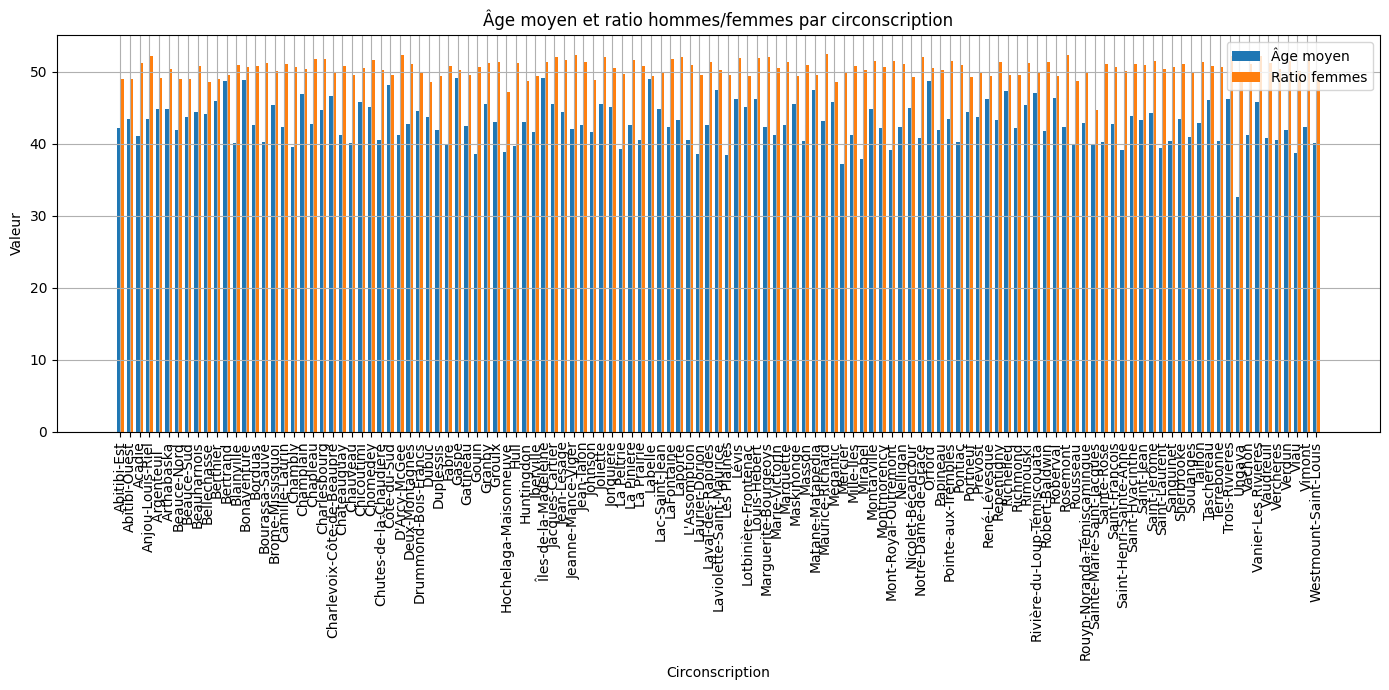

In [8]:
plt.figure(figsize=(14, 7))
width = 0.35
x = range(len(variables['Circonscription']))

plt.bar(x, variables['age_moyen'], width, label='Âge moyen', color='tab:blue')
plt.bar([i + width for i in x], variables['ratio_femmes'] * 100, width, label='Ratio femmes', color='tab:orange')

plt.title('Âge moyen et ratio hommes/femmes par circonscription')
plt.xlabel('Circonscription')
plt.ylabel('Valeur')
plt.xticks([i + width/2 for i in x], variables['Circonscription'], rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


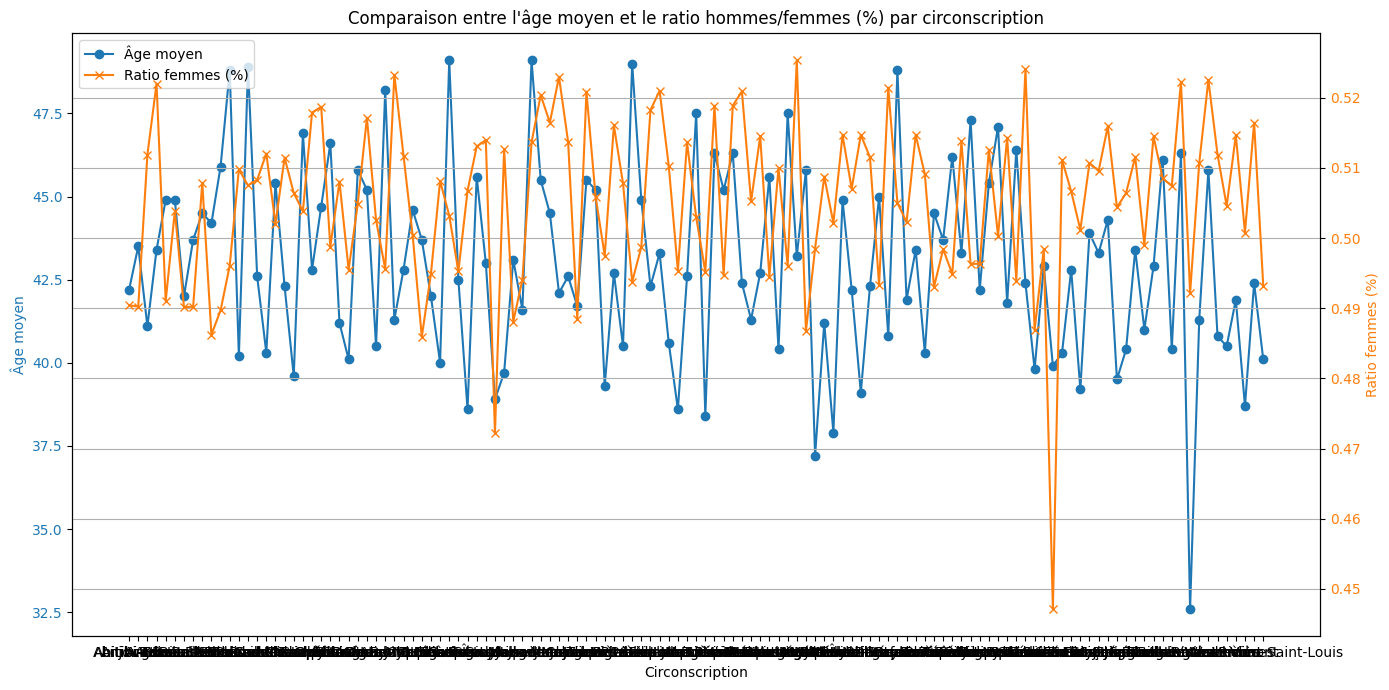

In [9]:
# Créer le graphique avec deux échelles d'axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Tracer l'âge moyen sur l'axe principal (en bleu)
color_age = 'tab:blue'
ax1.set_xlabel('Circonscription')
ax1.set_ylabel('Âge moyen', color=color_age)
line1 = ax1.plot(variables['Circonscription'], variables['age_moyen'], color=color_age, marker='o', label='Âge moyen')
ax1.tick_params(axis='y', labelcolor=color_age)

# Créer un second axe pour le ratio hommes/femmes (en orange)
ax2 = ax1.twinx()
color_ratio = 'tab:orange'
ax2.set_ylabel('Ratio femmes (%)', color=color_ratio)
line2 = ax2.plot(variables['Circonscription'], variables['ratio_femmes'], color=color_ratio, marker='x', label='Ratio femmes (%)')
ax2.tick_params(axis='y', labelcolor=color_ratio)

# Ajouter un titre et une légende
plt.title('Comparaison entre l\'âge moyen et le ratio hommes/femmes (%) par circonscription')
plt.xticks(rotation=90)

# Ajouter une légende combinée
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# Afficher le graphique
fig.tight_layout()
plt.grid(True)
plt.show()


In [10]:
# Il semble y avoir une corrélation, mais ça ne saute pas particulièrement aux yeux.  Vérifions de manière mathématique.

correlation_spearman = variables['age_moyen'].corr(variables['difference_ratio'], method='spearman')
print(f"Coefficient de corrélation de Spearman : {correlation_spearman:.3f}")


Coefficient de corrélation de Spearman : -0.035


In [ ]:
# Ça prouve qu'il ne faut pas se fier uniquement à nos yeux.  Il y a cependant des nombres qui semblent vraiment éloignés pour quelque circonscriptions,
# on pourrait peut-être les retirer et comparer à nouveau, mais avec un coefficient si près de zéro, il serait étonnant qu'on découvre quelque chose magré tout.